RIDGE REGRESSION

It is used to create a simple model when no of independent variables are more than the samples or when the dataset has multiple linearity i.e,  corelation delivery independent variablle .

In [ ]:
import pandas as pd
import numpy as np

READ THE CSV FILE

In [ ]:
df=pd.read_csv("bioactivity_data_3class_pIC50.csv")

In [ ]:
df.shape

(65, 9)

In [ ]:
df.size

585

In [ ]:
df.ndim

2

In [ ]:
df.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL191881,CC(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(C)C)C(=O)...,active,426.562,0.01507,6.0,5.0,7.060481
1,1,CHEMBL374508,CC(C)C[C@H](NC(=O)[C@H]1O[C@@H]1C(=O)O)C(=O)NC...,active,357.411,-1.46090,5.0,5.0,6.317404
2,2,CHEMBL1689603,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2ccccc21,inactive,343.471,3.14620,3.0,3.0,4.301030
3,3,CHEMBL1689604,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2ccc(Cl)...,inactive,377.916,3.79960,3.0,3.0,4.301030
4,4,CHEMBL1689605,CC(C)CCNC(=O)[C@H](CC(C)C)NC=C1C(=O)Nc2cc(Cl)c...,inactive,377.916,3.79960,3.0,3.0,4.301030


In [ ]:
df.tail()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
60,60,CHEMBL4582464,CC(C(=O)N1c2ccccc2CCc2ccccc21)n1nnc(-c2ccc(N3C...,intermediate,480.572,4.2012,0.0,7.0,5.175874
61,61,CHEMBL4451728,COc1ccc(NC(=O)Cn2nnc(-c3ccccc3NC(=O)c3cc(OC)cc...,intermediate,488.504,3.2569,2.0,9.0,5.175874
62,62,CHEMBL1302947,O=C(Cn1nnc(-c2ccccc2)n1)NNC(=O)c1ccco1,intermediate,312.289,0.3943,2.0,7.0,5.175874
63,63,CHEMBL4646055,CN1CCCc2cc(CCNC(=O)C(=O)Nc3ccc4c(c3)OCO4)ccc21,intermediate,381.432,2.0951,2.0,5.0,5.000869
64,64,CHEMBL4637201,O=C(NCCCNC(=O)c1cc2ccccc2[nH]1)c1ccc(-c2ccccc2...,intermediate,397.478,4.3848,3.0,2.0,5.067526


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          65 non-null     int64  
 1   molecule_chembl_id  65 non-null     object 
 2   canonical_smiles    65 non-null     object 
 3   class               65 non-null     object 
 4   MW                  65 non-null     float64
 5   LogP                65 non-null     float64
 6   NumHDonors          65 non-null     float64
 7   NumHAcceptors       65 non-null     float64
 8   pIC50               65 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 4.7+ KB


In [ ]:
df.describe()

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,32.00000,545.833631,3.552997,3.046154,6.138462,5.270760
std,18.90767,196.489394,1.665719,1.545465,1.878138,0.967367
min,0.00000,287.363000,-1.460900,0.000000,2.000000,4.301030
25%,16.00000,411.933000,2.760500,2.000000,5.000000,4.301030
50%,32.00000,470.591000,3.684200,3.000000,6.000000,5.175874
75%,48.00000,778.870000,4.619320,5.000000,8.000000,6.267606
max,64.00000,915.108000,6.805000,6.000000,9.000000,7.221849


In [ ]:
df.dtypes

Unnamed: 0              int64
molecule_chembl_id     object
canonical_smiles       object
class                  object
MW                    float64
LogP                  float64
NumHDonors            float64
NumHAcceptors         float64
pIC50                 float64
dtype: object

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.nunique()

Unnamed: 0            65
molecule_chembl_id    65
canonical_smiles      65
class                  3
MW                    58
LogP                  60
NumHDonors             6
NumHAcceptors          8
pIC50                 34
dtype: int64

In [ ]:
df.corr(numeric_only=True)

,Unnamed: 0,MW,LogP,NumHDonors,NumHAcceptors,pIC50
Unnamed: 0,1.000000,0.283682,0.217990,-0.047590,0.598842,0.254981
MW,0.283682,1.000000,0.715364,0.678099,0.654625,0.449075
LogP,0.217990,0.715364,1.000000,0.195749,0.270479,0.070561
NumHDonors,-0.047590,0.678099,0.195749,1.000000,0.256153,0.536329
NumHAcceptors,0.598842,0.654625,0.270479,0.256153,1.000000,0.385758
pIC50,0.254981,0.449075,0.070561,0.536329,0.385758,1.000000


In [ ]:
import pexpect
import pkg_resources

pexpect_version = pkg_resources.get_distribution("pexpect").version
print("pexpect version:", pexpect_version)


pexpect version: 4.8.0


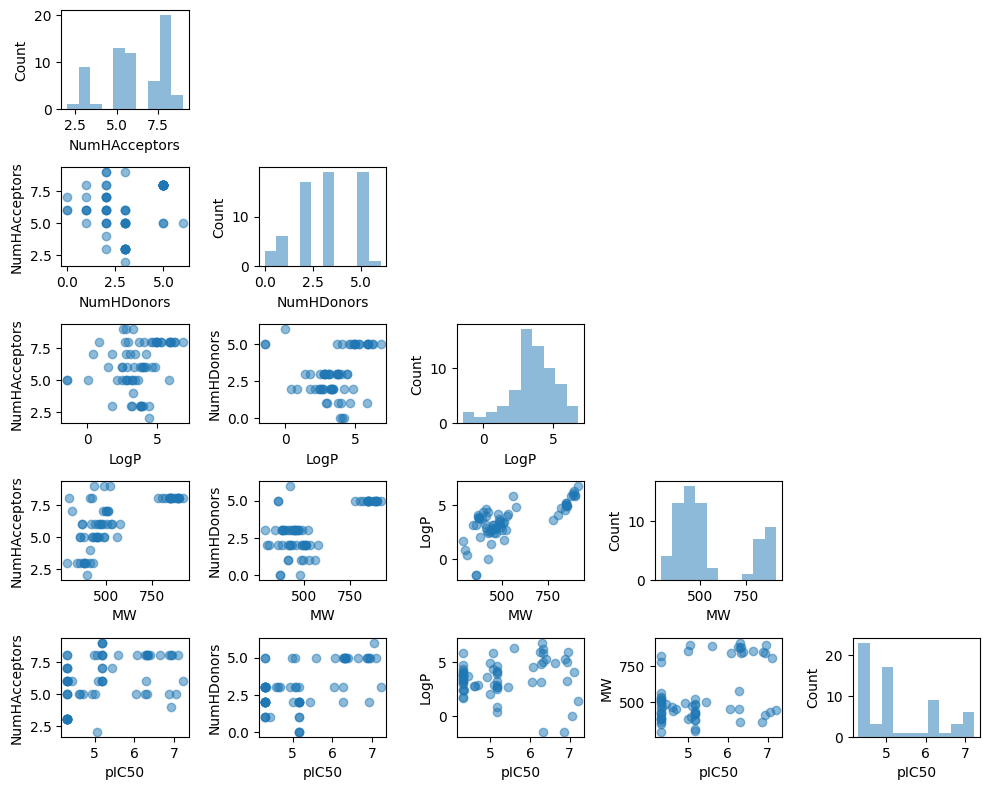

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols=["NumHAcceptors","NumHDonors","LogP","MW","pIC50"]
scatterplotmatrix(df[cols].values,figsize=(10,8),names=cols,alpha=0.5)
plt.tight_layout()
plt.show()

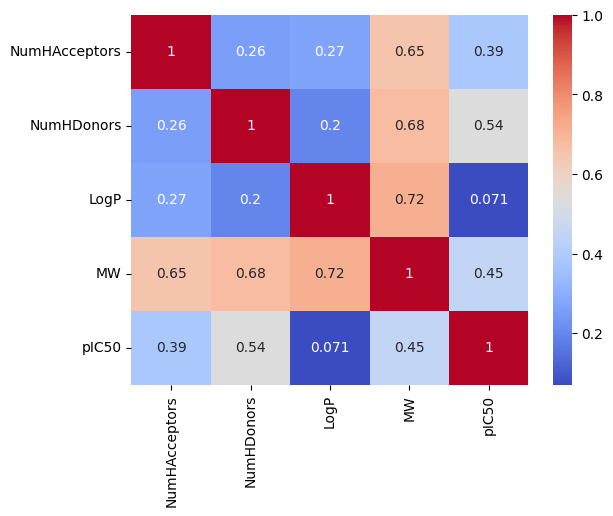

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your pandas DataFrame and 'cols' is a list of column names

# Calculate the correlation matrix
cm = np.corrcoef(df[cols].values.T)

# Create a DataFrame with column names
corr_matrix = pd.DataFrame(cm, columns=cols, index=cols)

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


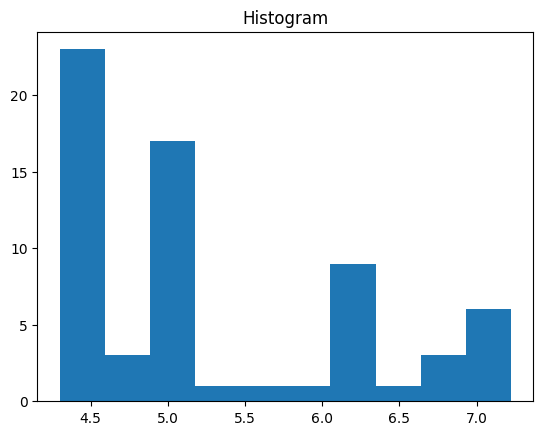

In [ ]:
plt.title("Histogram")
plt.hist(df["pIC50"])
plt.show()

In [ ]:
X=df.iloc[:, :-1]
Y=df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10)


In [ ]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_train' is your feature matrix and 'Y_train' is your target variable

# Convert any non-numeric columns in X_train to numeric using LabelEncoder
le = LabelEncoder()
X_train = X_train.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == object else col)

# Convert Y_train to numeric if it contains string values
Y_train = Y_train.astype(float)

# Now you can proceed with fitting the Ridge model
ridge.fit(X_train, Y_train)


Ridge(alpha=0.5)

In [ ]:
ridge.fit(X_train,Y_train)

Ridge(alpha=0.5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_test' is your test feature matrix

# Convert any non-numeric columns in X_test to numeric using LabelEncoder
le = LabelEncoder()
X_test = X_test.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == object else col)

# Now you can proceed with predicting using the Ridge model
Y_pred = ridge.predict(X_test)


In [ ]:
Y_pred=ridge.predict(X_test)

In [ ]:
Y_pred

array([4.82335465, 4.44677734, 5.09911355, 4.40524281, 4.1703009 ,
       6.03022028, 3.98679207, 6.07398626, 6.03659109, 5.91721001,
       4.26290519, 4.96275705, 4.76251941, 5.91215871, 4.9738531 ,
       6.05298065, 4.63839014])

In [ ]:
print("slope: %.2f" % ridge.coef_[0])

slope: 0.01


In [ ]:
print("Intercept: %.2f " % ridge.intercept_)

Intercept: 4.92 


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error (Y_test,Y_pred)

0.1877670550624183

In [ ]:
np.sqrt(mean_squared_error (Y_test,Y_pred))

0.43332096079282656

In [ ]:
print("Rsquared: %.2f"% ridge.score (X_test,Y_test))

Rsquared: 0.77
